<a href="https://colab.research.google.com/github/tallurikishore1/649/blob/main/06_02_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
cars = pd.read_csv(filename)
cars

Saving Cars.csv to Cars.csv


,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
print(cars.head())
print(cars.tail())
print(cars.shape)

   HP        MPG  VOL          SP         WT
0  49  53.700681   89  104.185353  28.762059
1  55  50.013401   92  105.461264  30.466833
2  55  50.013401   92  105.461264  30.193597
3  70  45.696322   92  113.461264  30.632114
4  53  50.504232   92  104.461264  29.889149
     HP        MPG  VOL          SP         WT
76  322  36.900000   50  169.598513  16.132947
77  238  19.197888  115  150.576579  37.923113
78  263  34.000000   50  151.598513  15.769625
79  295  19.833733  119  167.944460  39.423099
80  236  12.101263  107  139.840817  34.948615
(81, 5)


In [ ]:
cars.isnull()

,HP,MPG,VOL,SP,WT
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
76,False,False,False,False,False
77,False,False,False,False,False
78,False,False,False,False,False
79,False,False,False,False,False


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [ ]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [ ]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


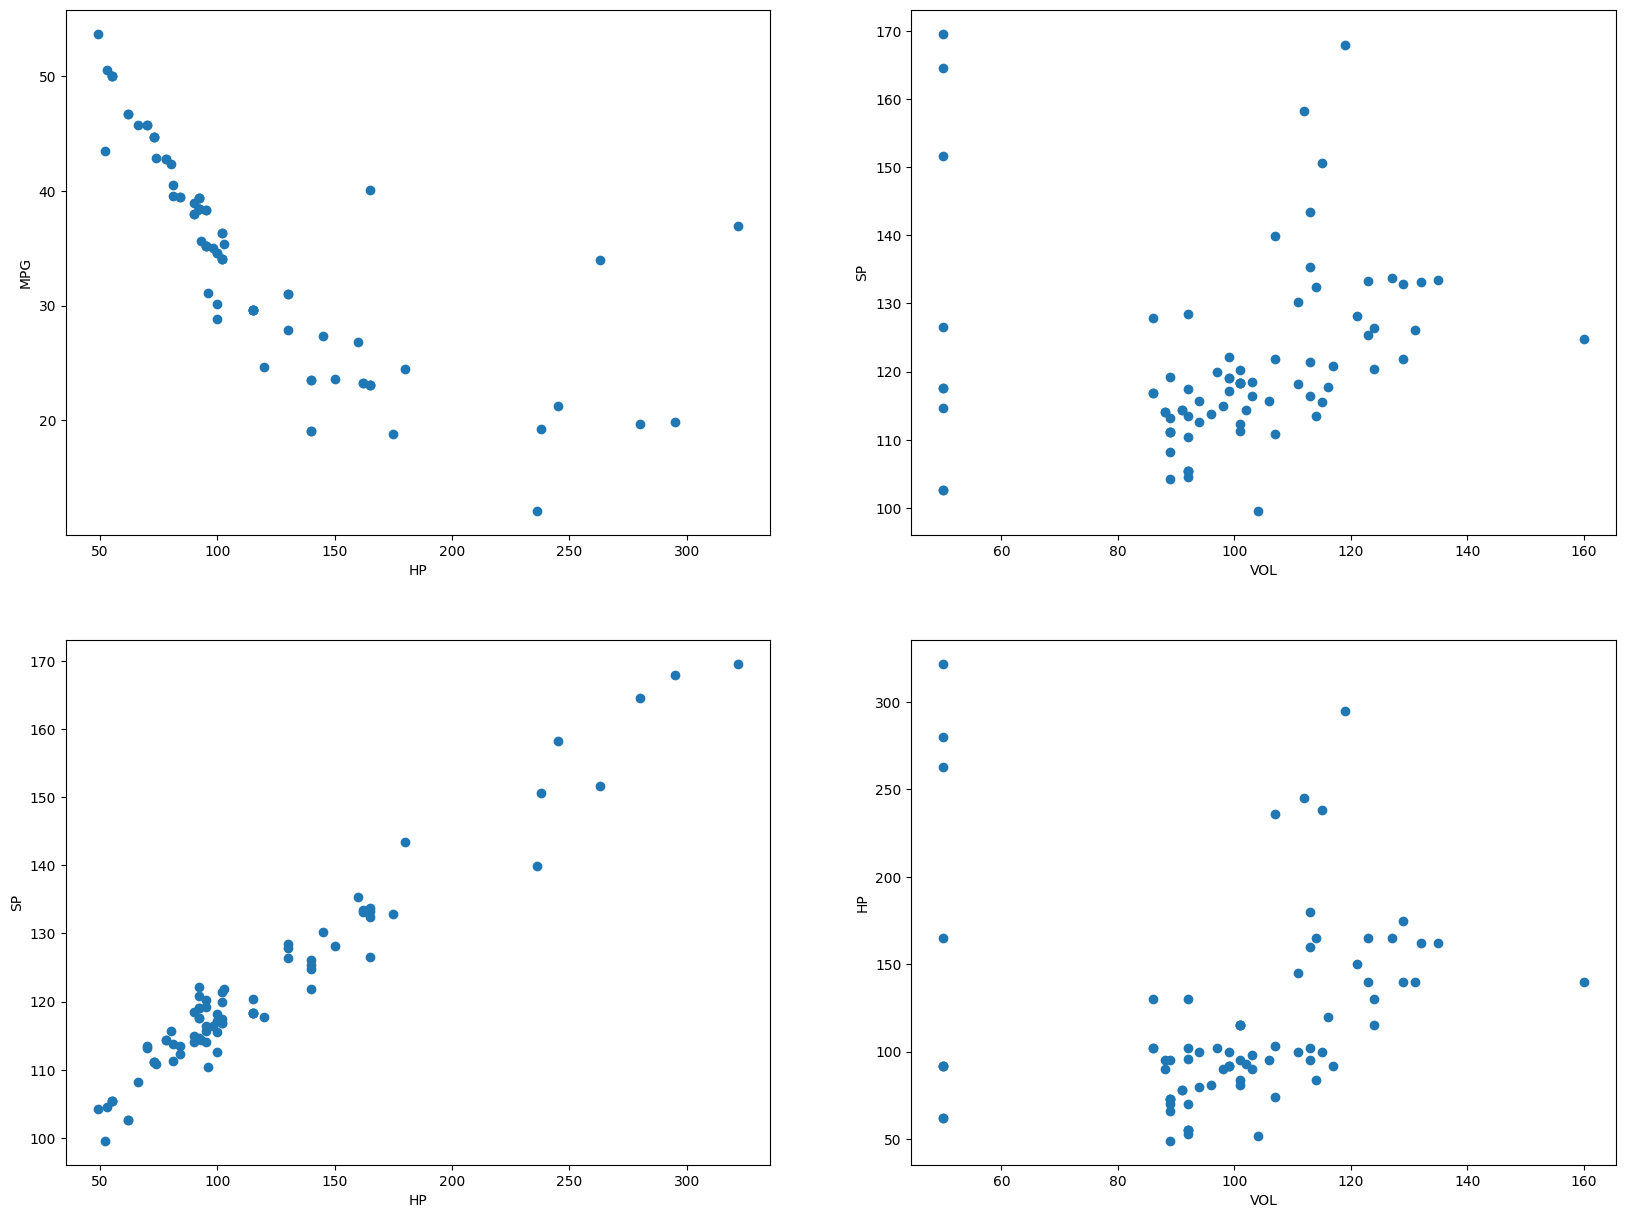

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.scatter(cars['HP'],cars['MPG'])
plt.xlabel('HP')
plt.ylabel('MPG')
plt.subplot(2,2,2)
plt.scatter(cars['VOL'],cars['SP'])
plt.xlabel('VOL')
plt.ylabel('SP')
plt.subplot(2,2,3)
plt.scatter(cars['HP'],cars['SP'])
plt.xlabel('HP')
plt.ylabel('SP')
plt.subplot(2,2,4)
plt.scatter(cars['VOL'],cars['HP'])
plt.xlabel('VOL')
plt.ylabel('HP')
plt.show()


In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [ ]:
model.params

,0
Intercept,30.677336
WT,0.400574
VOL,-0.336051
SP,0.395627
HP,-0.205444


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        06:33:08   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model.tvalues, model.pvalues

(Intercept    2.058841
 WT           0.236541
 VOL         -0.590970
 SP           2.499880
 HP          -5.238735
 dtype: float64,
 Intercept    0.042936
 WT           0.813649
 VOL          0.556294
 SP           0.014579
 HP           0.000001
 dtype: float64)

In [ ]:
model.rsquared, model.rsquared_adj

(0.7705372737359842, 0.7584602881431413)

In [ ]:
ml_v = smf.ols('MPG~VOL',data = cars).fit()
print(ml_v.tvalues,ml_v.pvalues)
print(ml_v.rsquared, ml_v.rsquared_adj)

Intercept    14.106056
VOL          -5.541400
dtype: float64 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64
0.27990086511227075 0.27078568618964116


In [ ]:
ml_v = smf.ols('MPG~WT',data = cars).fit()
print(ml_v.tvalues,ml_v.pvalues)
print(ml_v.rsquared, ml_v.rsquared_adj)

Intercept    14.248923
WT           -5.508067
dtype: float64 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64
0.2774751389270127 0.2683292546096331


In [ ]:
ml_v = smf.ols('MPG~SP',data = cars).fit()
print(ml_v.tvalues,ml_v.pvalues)
print(ml_v.rsquared, ml_v.rsquared_adj)

Intercept    13.695100
SP           -8.406007
dtype: float64 Intercept    1.457105e-22
SP           1.407325e-12
dtype: float64
0.4721402334141218 0.46545846421683224


In [ ]:
ml_v = smf.ols('MPG~HP',data = cars).fit()
print(ml_v.tvalues,ml_v.pvalues)
print(ml_v.rsquared, ml_v.rsquared_adj)

Intercept    29.722460
HP           -9.357053
dtype: float64 Intercept    1.211037e-44
HP           1.956490e-14
dtype: float64
0.5256806086282022 0.5196765656994453


In [ ]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)
rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)
rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)
rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)
(vif_hp,vif_wt,vif_vol,vif_sp)

(19.92658897499852, 639.5338175572624, 638.8060836592878, 20.00763878305008)

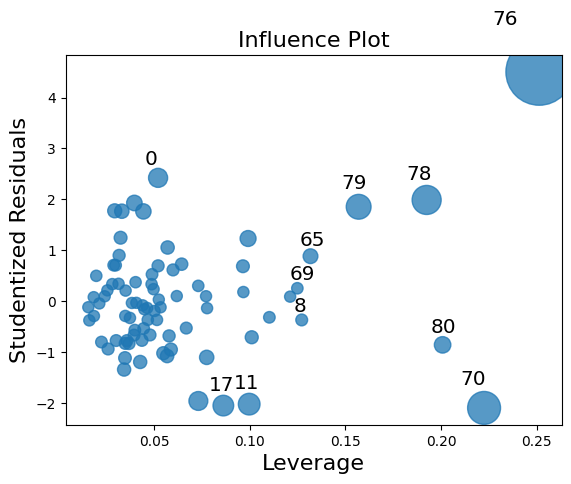

0.2222222222222222

In [ ]:
import matplotlib.pyplot as plt
influence_plot(model)
plt.show()
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

In [ ]:
cars_new = cars.drop(cars.index[[70,76]],axis=0)
cars_new

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
ml_v = smf.ols('MPG~HP',data = cars_new).fit()
print(ml_v.tvalues,ml_v.pvalues)
print(ml_v.rsquared, ml_v.rsquared_adj)

Intercept    33.689952
HP          -11.977968
dtype: float64 Intercept    7.691848e-48
HP           2.873963e-19
dtype: float64
0.6507488614373051 0.6462131323650624


In [ ]:
ml_v = smf.ols('MPG~VOL',data = cars_new).fit()
print(ml_v.tvalues,ml_v.pvalues)
print(ml_v.rsquared, ml_v.rsquared_adj)

Intercept    15.473856
VOL          -6.852404
dtype: float64 Intercept    2.425188e-25
VOL          1.579949e-09
dtype: float64
0.378809007625059 0.3707415921396702


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf # Importing the required library

rsq_hp = smf.ols('HP~WT+VOL+SP', data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP', data=cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)

rsq_vol = smf.ols('VOL~WT+SP+HP', data=cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)

rsq_sp = smf.ols('SP~WT+VOL+HP', data=cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)

d1 = {'Variables': ['Hp', 'WT', 'VOL', 'SP'], 'VIF': [vif_hp, vif_wt, vif_vol, vif_sp]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


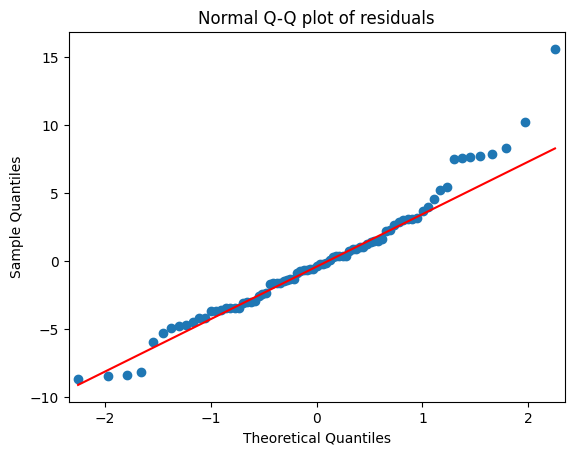

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot = sm.qqplot(model.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()


In [ ]:
list(np.where(model.resid>10))

[array([ 0, 76])]

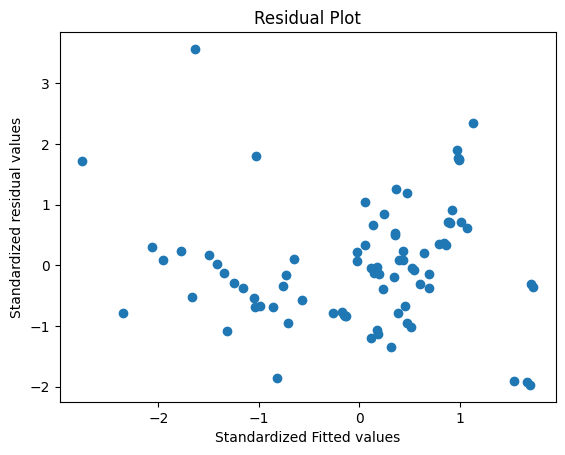

In [ ]:
def get_standardized_values(vals):
    return (vals - vals.mean()) / vals.std()

plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()


In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

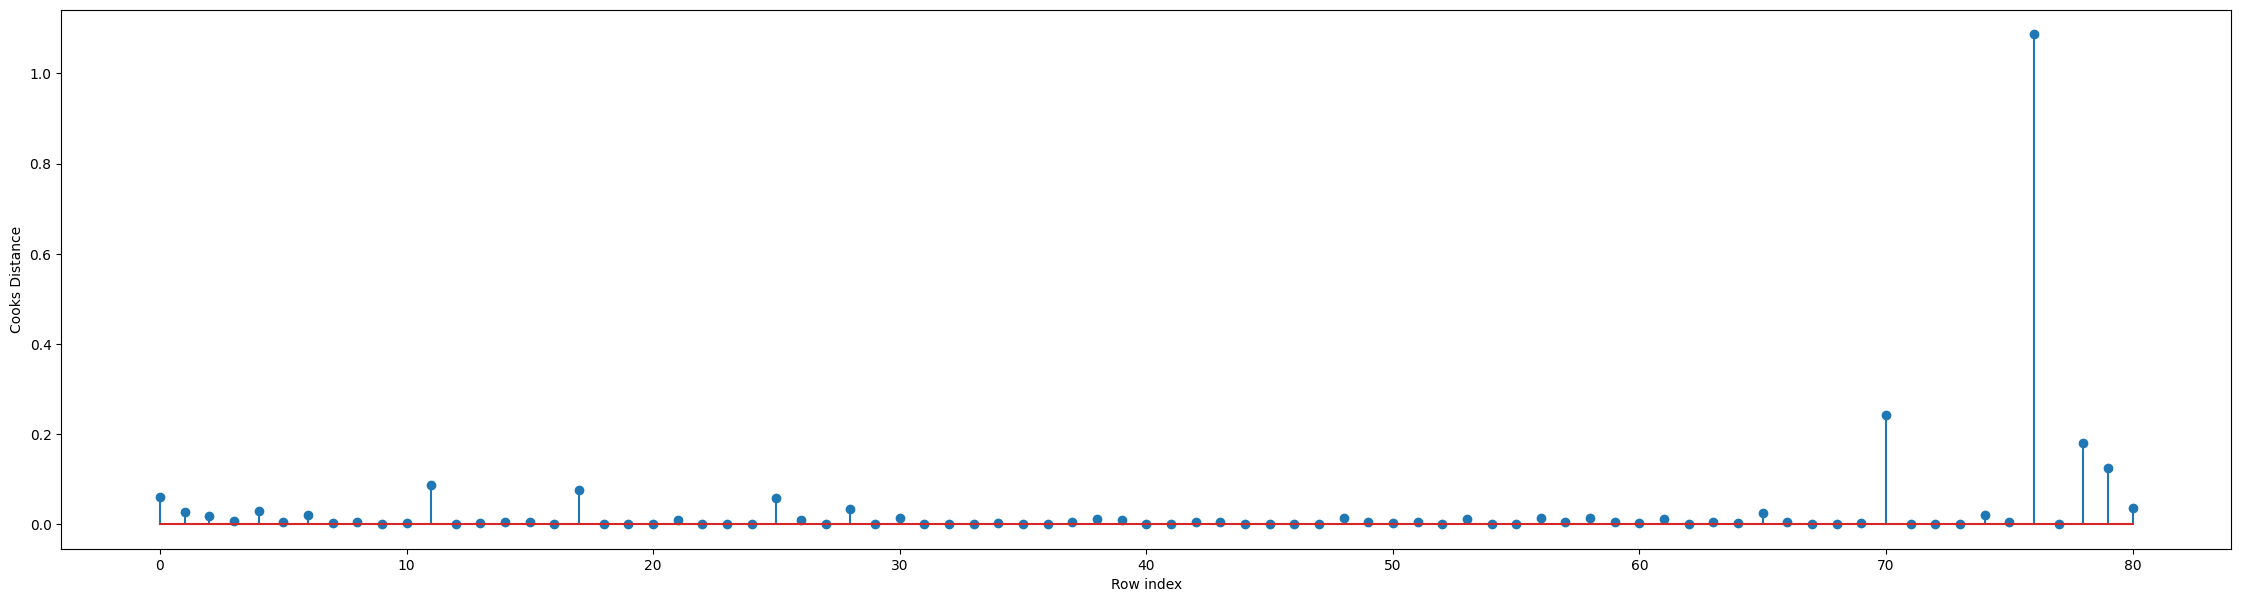

In [ ]:
fig = plt.subplots(figsize=(28, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:

(np.argmax(c), np.max(c))

(76, 1.0865193998179699)

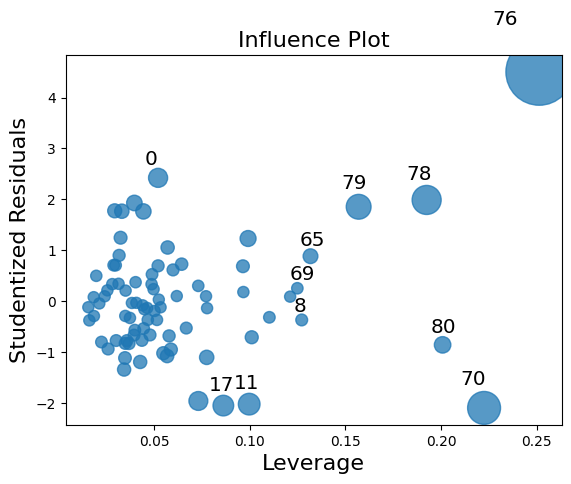

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model,figsize=(15,8))
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
cars = pd.read_csv(filename)
cars

Saving Cars.csv to Cars (1).csv


,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
car1 = cars_new.drop(cars_new.index[[70,76]], axis=0).reset_index()
car1

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
72,74,140,19.086341,129,121.864163,42.618698
73,75,175,18.762837,129,132.864163,42.778219
74,77,238,19.197888,115,150.576579,37.923113
75,79,295,19.833733,119,167.944460,39.423099


In [ ]:
car1 = car1.drop(['index'], axis=1)
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,129,121.864163,42.618698
73,175,18.762837,129,132.864163,42.778219
74,238,19.197888,115,150.576579,37.923113
75,295,19.833733,119,167.944460,39.423099


In [ ]:
final_ml_V = smf.ols("MPG~VOL+SP+HP", data=car1).fit()

In [ ]:
(final_ml_V.rsquared, final_ml_V.aic)

(0.8393765785233822, 425.02085603388525)

In [ ]:
final_ml_W = smf.ols("MPG~WT+SP+HP", data=car1).fit()

In [ ]:
(final_ml_W.rsquared, final_ml_W.aic)

(0.8387656607744454, 425.31316356164535)

In [ ]:
new_data = pd.DataFrame({'HP':40,'VOL':95,'SP':102,'WT':35},index=[1])

In [ ]:
final_ml_V.predict(new_data)

,0
1,44.868243


In [ ]:
final_ml_V.predict(cars_new.iloc[0:5,])

,0
0,44.515004
1,43.145155
2,43.145155
3,43.241164
4,43.165645
